In [93]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#Yellowbrick: Machine Learning Visualization
from yellowbrick.classifier import ClassificationReport
import matplotlib.pyplot as plt


# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [52]:
# print the shapes of X and y
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [78]:

#                                  ~~~~~~~~~~~*Logistic regression Classifier*~~~~~~~~~~

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
# compare actual response values (y_test) with predicted response values (y_pred)
print("LogisticRegression accuracy score : ",accuracy_score(y_test, pred_logreg))
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))


LogisticRegression accuracy score :  0.9666666666666667
[[25  0  0]
 [ 0 16  1]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



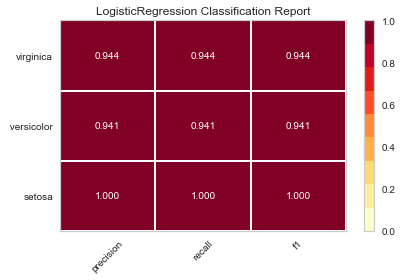

In [92]:
#                                  ~~~~~~~~~~~*Logistic regression visual plot*~~~~~~~~~~
visualizer = ClassificationReport(logreg, classes=['setosa', ' versicolor','virginica'])
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g_logreg = visualizer.show()

The optimum K for this data set is k = 19


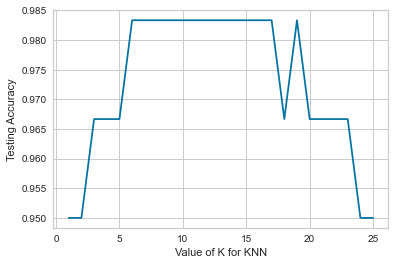

In [91]:
#                                  ~~~~~~~~~~~*K-Neighbors Classifier*~~~~~~~~~~

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

#try K=1 through K=25 and record testing accuracy
k_optimum=1
previous_accuracy=0
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
    if metrics.accuracy_score(y_test, y_pred)>previous_accuracy:
        k_optimum=k
    
    previous_accuracy=metrics.accuracy_score(y_test, y_pred)
        
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')   
print("The optimum K for this data set is k =",k_optimum)

In [88]:
# evaluate the best KNN option accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print (k_optimum)
knn = KNeighborsClassifier(n_neighbors=k_optimum)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNeighbors accuracy score : ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

19
KNeighbors accuracy score :  0.9833333333333333
[[25  0  0]
 [ 0 16  1]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.94      0.97        17
           2       0.95      1.00      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



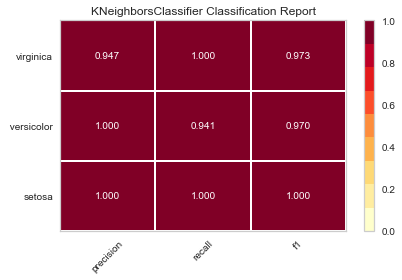

In [89]:
#                                  ~~~~~~~~~~~*K-Neighbors Classifier visual plot*~~~~~~~~~~
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn, classes=['setosa', ' versicolor','virginica'])
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g_KNN = visualizer.poof()  # Draw/show/poof the data

This data set is arranged in a table and allows easy access to the information stored in it.
Through Machine learning library SKlearn, it is relatively easy to analyze the information and predict results at a fairly accurate level.
In this project I focused on two types of machine learning, from the SKlearn library:
1) Logistic Regression 
2) K Neighbors classifier-KNN

I choosed to Splite the dataset into two pieces: a training set-60 % and a testing set-40 %.
The random state was set to a fixed value - 4, in order to get a fixed result for the same parameters each time I run the program.

Logistic Regression:
accuracy score :  96.67%

K Neighbors classifier:
For KNN algorithm, I test the prediction accuracy for diffrent value K - neighbors, in order to find the optimum K value.
After tuning the K value I got quite accurate prediction accuracy of 98.3%.

For both algorithm the prediction for the Setosa Iris flower was 100% accurate 
